<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Армен! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span> 

<span style="color: blue; font-size: 18px; font-weight: bold;">Комментарий ревьюера 2</span>

<span style="color: blue">Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</span> 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

Признаки:
- `datetime` - время заказа такси
- `num_orders` - количество заказов

In [1]:
#Импорт необходимых библиотек
!pip3 install scikit-learn==1.1.3 -q 
!pip3 install statsmodels -q
#!pip3 install pandas

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn
import pandas as pd
import numpy as np

In [3]:
#инструменты
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import (
    accuracy_score, mean_absolute_error, mean_squared_error,
    r2_score, confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, make_scorer
)

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Но их лучше собрать в одной ячейке и разделить на функциональные группы пустой строкой.</font>

In [4]:
# константы
RANDOM_STATE = 42
TEST_SIZE = 0.1

In [5]:
server_path_taxi = '/datasets/taxi.csv'
local_path_taxi = 'taxi.csv'

try:
    taxi = pd.read_csv(server_path_taxi, parse_dates=[0], index_col='datetime')
    
except:
    taxi = pd.read_csv(local_path_taxi, parse_dates=[0], index_col='datetime')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что время сразу в индексе!</font>

## Подготовка

In [6]:
taxi.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [7]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [8]:
taxi.isna().sum()

num_orders    0
dtype: int64

In [9]:
taxi.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


- Классический временной ряд. 
- Даты сделали индексами. 
- Нужно расположить их в хронологическом порядке.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

In [10]:
taxi.index.is_monotonic

True

- Данные монотонны по индексу(времени). 
- Выполним ресемплирование по одному часу.

In [11]:
taxi_data = taxi.resample('1H').sum()
taxi_data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Ресемплирование по часу выполнено верно. Супер, что значения просуммированы, это проще интерпретируется, чем использование других агрегационных функций.</font>

In [12]:
taxi_data.isna().sum()

num_orders    0
dtype: int64

In [13]:
taxi_data.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


- наблюдаем, что в период с  `00:00:00` по `01:00:00` было больше всего заказов - **124**, в то время как в период с `04:00:00` утра по  `05:00:00` утра было меньше всего заказов - **43**.

**Вывод:**

- данные корректно загрузились
- информация в датасете представляет из себя количество заказов такси за указанный промежуток времени
- минимальное количество заказов равно 0, макимум равен 119, а медиана 13
- пропуски в данных не обнаружено
- наблюдаем, что в период с  `00:00:00` по `01:00:00` было больше всего заказов - **124**, в то время как в период с `04:00:00` утра по  `05:00:00` утра было меньше всего заказов - **43**.


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что не забываешь про промежуточные выводы.</font>

## Анализ

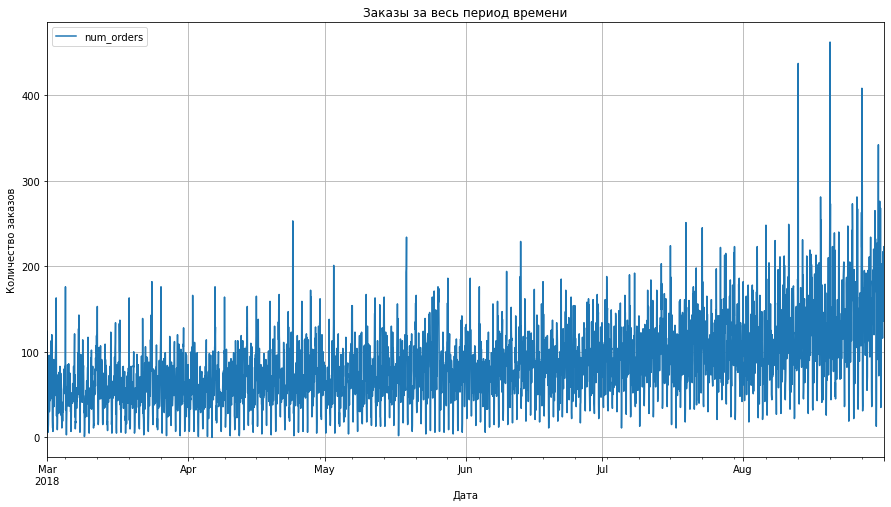

In [14]:
taxi_data.plot(figsize=(15, 8))
plt.title('Заказы за весь период времени')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Есть график временного ряда! </font>

In [15]:
print(f'Среднее значение до Июня: {round(taxi_data[: "2018-06-01"]["num_orders"].mean(), 3)}')
print(f'Среднее значение после Июня: {round(taxi_data["2018-06-01":]["num_orders"].mean(), 3)}')

Среднее значение до Июня: 65.181
Среднее значение после Июня: 103.842


- по графику виден тренд роста заказов к августу
- разложим временной ряд на составляющие - тред, сезонность и остатки

In [16]:
decomposed = seasonal_decompose(taxi_data)

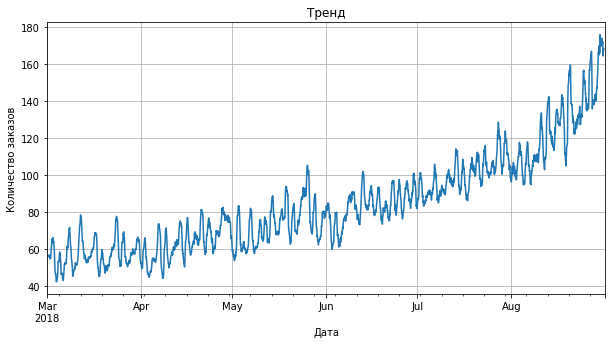

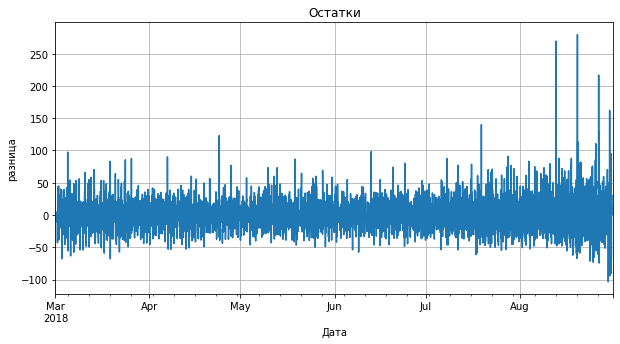

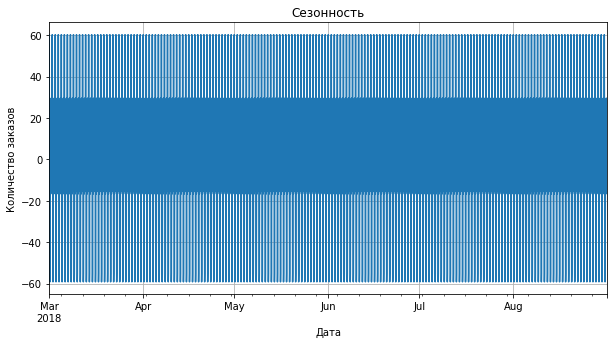

In [17]:
plt.figure(figsize=(10, 5))
decomposed.trend.plot(ax = plt.gca())
plt.title('Тренд')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
decomposed.resid.plot(ax = plt.gca())
plt.title('Остатки')
plt.xlabel('Дата')
plt.ylabel('разница')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
decomposed.seasonal.plot(ax = plt.gca())
plt.title('Сезонность')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

Тренд вполне ожидаем, так как это заказы такси около аэропорта, то можно установить некоторую связь между ростом продаж авиабилетов и ростом заказов такси летом.

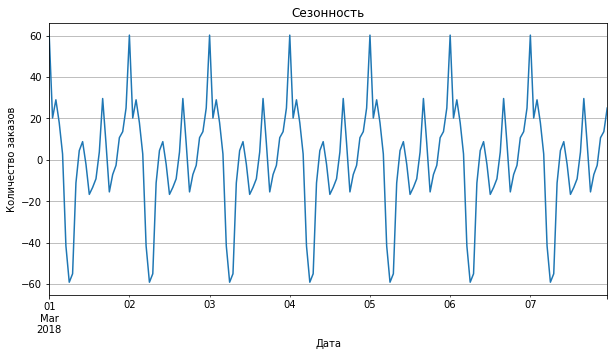

In [18]:
plt.figure(figsize=(10, 5))
decomposed.seasonal['2018-03-01':'2018-03-07'].plot(ax = plt.gca())
plt.title('Сезонность')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid()

- по графику видно, что сезонность представляет из себя колебания с периодом в один день

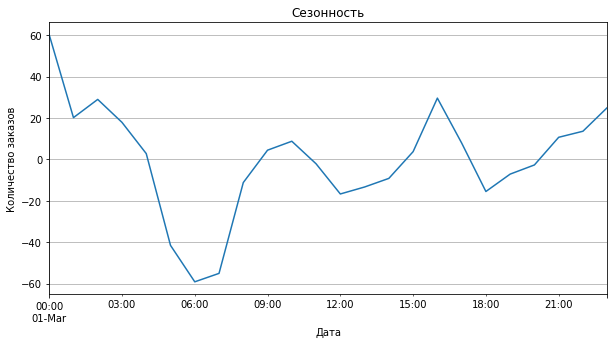

In [19]:
plt.figure(figsize=(10, 5))
decomposed.seasonal['2018-03-01'].plot(ax = plt.gca())
plt.title('Сезонность')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid()

- пик заказов около 00:00
- минимум в 06:00
- локальный максимум около 15:00 
- c 18:00 идет рост заказов вплоть до 00:00 

*Данные наблюдения можно объяснить, так как скорее всего мало рейсов назначены в 6 утра, в то время как ночью и днем вылетает значительное количество самолетов.*

*По графику остатков можно отметить характерный шаблон на протяжении всего промежутка, но после августа наблюдаются какие-то шумы, скорее это вызвано трендом.*

In [20]:
taxi_data_aug = taxi_data['2018-08-01':]
taxi_data_aug['rolling_mean'] = taxi_data_aug.shift().rolling(5).mean()

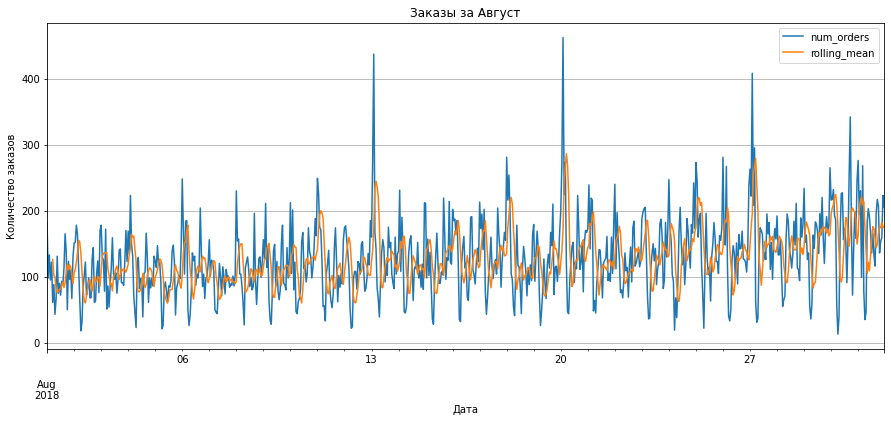

In [21]:
taxi_data_aug.plot(figsize=(15, 6))
plt.title('Заказы за Август');
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

- график отбражает, что 13-го, 20-го и 27 августа наблюдаются пики по количеству заказов

**Вывод:**

- по графику виден тренд роста заказов к августу
- разложим временной ряд на составляющие - тред, сезонность и остатки
- тренд вполне ожидаем, так как это заказы такси около аэропорта, то можно установить некоторую связь между ростом продаж авиабилетов и ростом заказов такси летом.
- пик заказов около 00:00
- минимум в 06:00
- локальный максимум около 15:00 
- c 18:00 идет рост заказов вплоть до 00:00 
- данные наблюдения можно объяснить, так как скорее всего мало рейсов назначены в 6 утра, в то время как ночью и днем вылетает значительное количество самолетов.
- по графику остатков можно отметить характерный шаблон на протяжении всего промежутка, но после августа наблюдаются какие-то шумы, скорее это вызвано трендом.
- график отбражает, что 13-го, 20-го и 27 августа наблюдаются пики по количеству заказов

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что компоненты рассмотренны на различных временных интервалах.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Если ресемлировать ряд по дню и вывести интервал около месяца, то можно увидеть сезонность внутри недели.</font>

## Обучение

In [23]:
# # функция создания признаков
# def make_features(data, max_lag, rolling_mean_size):
#     df_new = data.copy()
    
#     df_new['year'] = df_new.index.year
#     df_new['month'] = df_new.index.month
#     df_new['day'] = df_new.index.day
#     df_new['dayofweek'] = df_new.index.dayofweek
    
#     for lag in range(1, max_lag + 1):
#         df_new['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
#     df_new['rolling_mean'] = df_new['num_orders'].shift().rolling(rolling_mean_size).mean()
    
#     return df_new

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s>На мой взгляд: не все признаки подходят, чисто логически. Выскажу свою позицию:<br>

<font color='red'>1) Признак год: НЕТ, однозначно не подходит. У нас данных меньше года. Поэтому будет просто константа.<br>
2) Признак месяц: НЕТ, аналогично году, у нас в истории всего один март, май.... Да и горизонт прогноза - часы. Поэтому сезонность времени года будет просто в тренде уже заложена.</font><br>
<font color='darkorange'>3) Признак день: НЕТ, также не подходит, у нас нет сезонности внутри месяца, будет просто последовательность чисел.</s><br></font>
<font color='green'>4) Признак день недели: ДА, т.к. у нас есть недельная сезонность.<br>
5) Признак час: ДА, т.к. есть часовая (суточная) сезонность.<br>
6) Признак lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
7) Признак rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда.</font> <br>

<font color='blue'>Как ты думаешь?</font>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Согласен с замечанием.</font>
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Супер! Убрали лишний шум из модели!</font>

In [22]:
# функция создания признаков
def make_features(data, max_lag, rolling_mean_size):
    df_new = data.copy()
    
    df_new['hour'] = df_new.index.hour
    df_new['dayofweek'] = df_new.index.dayofweek
    
    
    for lag in range(1, max_lag + 1):
        df_new['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
    df_new['rolling_mean'] = df_new['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return df_new

In [23]:
df_taxi_new = make_features(taxi_data, 20, 20)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Временной сдвиг лучше определить с учётом выявленных сезонностей\
Или можно подобрать лучшее сочетание предиктеров в цикле.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Можно, так же, посмотреть Автокорреляцию и оставить только значимые Лаги. Чем меньше признаков - тем модели проще расчитать прогноз. [Автокоррелеляция](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html)</font>

In [24]:
df_taxi_new.head()

,num_orders,hour,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,4,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_taxi_new = df_taxi_new.dropna()

In [26]:
df_taxi_new.head()

,num_orders,hour,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 20:00:00,61,20,3,45.0,73.0,44.0,43.0,66.0,48.0,32.0,...,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,53.30
2018-03-01 21:00:00,66,21,3,61.0,45.0,73.0,44.0,43.0,66.0,48.0,...,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,50.15
2018-03-01 22:00:00,113,22,3,66.0,61.0,45.0,73.0,44.0,43.0,66.0,...,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,49.20
2018-03-01 23:00:00,58,23,3,113.0,66.0,61.0,45.0,73.0,44.0,43.0,...,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,51.30
2018-03-02 00:00:00,90,0,4,58.0,113.0,66.0,61.0,45.0,73.0,44.0,...,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,50.90


In [27]:
X = df_taxi_new.drop(['num_orders'], axis=1)
y = df_taxi_new['num_orders']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    shuffle=False, 
    test_size = TEST_SIZE, 
    random_state=RANDOM_STATE
)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что запрещаешь перемешивание отчётов.</font>

Используем модели с различными гиперпараметрами:
- `CatBoostRegressor`
- `Ridge`
- `RandomForestRegressor`

**`CatBoostRegressor`**

In [28]:
param_grid = {
    'depth': [4, 6],
    'learning_rate': np.arange(0.1, 0.2),
}

model_cat = CatBoostRegressor(l2_leaf_reg = 0.5,
                              verbose = 0,
                              random_state = RANDOM_STATE)

tss = TimeSeriesSplit(n_splits = 5)

grid_search_cat = GridSearchCV(
    model_cat, 
    param_grid, 
    cv = tss, 
    scoring = 'neg_root_mean_squared_error'
)
grid_search_cat.fit(X_train, y_train)

best_model_cat = grid_search_cat.best_estimator_


print("Best parameters:", grid_search_cat.best_params_)
print("Best RMSE:", round(-grid_search_cat.best_score_, 3))


Best parameters: {'depth': 6, 'learning_rate': 0.1}
Best RMSE: 25.078


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что применяешь TimeSeriesSplit для кроссвалидации временных рядов.</font>

**`Ridge`**

In [29]:
param_grid = {
    'alpha': [0.1, 0.3, 0.5, 1, 10],  
}

model_ridge = Ridge(random_state = RANDOM_STATE)

grid_search_ridge = GridSearchCV(
    model_ridge, 
    param_grid, 
    cv=tss, 
    scoring='neg_root_mean_squared_error', 
    verbose=0,
    error_score='raise'
)

grid_search_ridge.fit(X_train, y_train)

best_model_ridge = grid_search_ridge.best_estimator_

print("Best parameters:", grid_search_ridge.best_params_)
print("Best RMSE:", round(-grid_search_ridge.best_score_, 3))

Best parameters: {'alpha': 10}
Best RMSE: 32.247


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

**`RandomForestRegressor`**

In [30]:
model_rfr = RandomForestRegressor(random_state=RANDOM_STATE)

param_rfr = {
    'n_estimators':range(5,18),
    'max_depth': range(2, 8)
}

tss_rfr = TimeSeriesSplit(n_splits=5)

grid_cv = GridSearchCV(
    model_rfr, param_rfr, scoring='neg_root_mean_squared_error', cv=tss_rfr, n_jobs=-1
).fit(X_train, y_train)

best_param_rfr = grid_cv.best_estimator_

print("Best parameters: ", grid_cv.best_params_)
print("Best RMSE:", round(-grid_cv.best_score_, 3))

Best parameters:  {'max_depth': 7, 'n_estimators': 17}
Best RMSE: 27.124


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

**Вывод:**

Модели  `CatBoostRegressor`, `Ridge`, `RandomForestRegressor` обучены и лучшими являются:

- `CatBoostRegressor`:
    - Best parameters: {'depth': 6, 'learning_rate': 0.1}
    - Best RMSE: 27.541
    
- `Ridge`:
    - Best parameters: {'alpha': 0.1}
    - Best RMSE: 31.286
    
- `RandomForestRegressor`:
    - Best parameters:  {'max_depth': 7, 'n_estimators': 15}
    - Best RMSE: 30.426
    
*Лучшей моделью на кросс-валидации считается `CatBoostRegressor`, именно ее мы и будем использовать для прогнозирования.*    


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

## Тестирование

Проведем тестирование на лучшей модели `CatBoostRegressor` и построим график.

In [31]:
pred_cat = best_model_cat.predict(X_test)
print("CatBoost RMSE: ", mean_squared_error(y_test, pred_cat, squared=False))

df_predicted = pd.DataFrame(pred_cat, columns=['predicted'])
df_actual = pd.DataFrame(y_test.values, columns=['actual'])

df_check_predicted = pd.concat([df_predicted, df_actual], axis=1)
df_check_predicted.index = y_test.index

CatBoost RMSE:  42.12393144185904


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

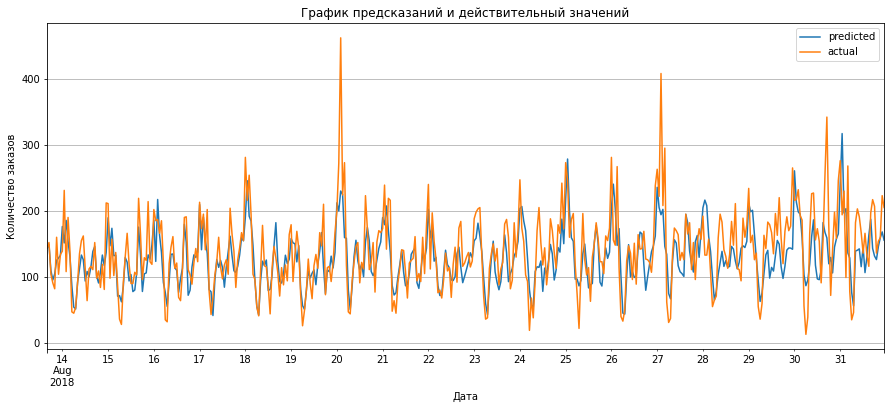

In [32]:
df_check_predicted.plot(figsize=(15, 6))
plt.title('График предсказаний и действительный значений')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что выводишь графики прогноза и реальных данных! Это один из важнейших инструментов анализа результатов моделирования временных рядов, чтобы увидеть где основные не "попадалки" модели.\
Лучше выбрать масштаб, скажем, несколько дней, чтобы увидеть можо было и сравнить каждый час.</font>

**Вывод:**

*Результат для тестовой модели весьма хороший, где `RMSE` равен 45.578, что меньше порога заказчика. Значит именно эту модель следует использовать для прогнозирования количества заказов.*

## Общий вывод

1. **Подготовка:**
- данные корректно загрузились
- информация в датасете представляет из себя количество заказов такси за указанный промежуток времени
- минимальное количество заказов равно 0, макимум равен 119, а медиана 13
- пропуски в данных не обнаружено
- наблюдаем, что в период с  `00:00:00` по `01:00:00` было больше всего заказов - **124**, в то время как в период с `04:00:00` утра по  `05:00:00` утра было меньше всего заказов - **43**.


2. **Анализ:**
- по графику виден тренд роста заказов к августу
- разложим временной ряд на составляющие - тред, сезонность и остатки
- тренд вполне ожидаем, так как это заказы такси около аэропорта, то можно установить некоторую связь между ростом продаж авиабилетов и ростом заказов такси летом.
- пик заказов около 00:00
- минимум в 06:00
- локальный максимум около 15:00 
- c 18:00 идет рост заказов вплоть до 00:00 
- данные наблюдения можно объяснить, так как скорее всего мало рейсов назначены в 6 утра, в то время как ночью и днем вылетает значительное количество самолетов.
- по графику остатков можно отметить характерный шаблон на протяжении всего промежутка, но после августа наблюдаются какие-то шумы, скорее это вызвано трендом.
- график отбражает, что 13-го, 20-го и 27 августа наблюдаются пики по количеству заказов


3. **Обучение:**

Модели  `CatBoostRegressor`, `Ridge`, `RandomForestRegressor` обучены и лучшими являются:

- `CatBoostRegressor`:
    - Best parameters: {'depth': 6, 'learning_rate': 0.1}
    - Best RMSE: 27.541
    
- `Ridge`:
    - Best parameters: {'alpha': 0.1}
    - Best RMSE: 31.286
    
- `RandomForestRegressor`:
    - Best parameters:  {'max_depth': 7, 'n_estimators': 15}
    - Best RMSE: 30.426
  
*Лучшей моделью на кросс-валидации считается `CatBoostRegressor`, именно ее мы и будем использовать для прогнозирования.*    


4. **Тестирование**
*Результат для тестовой модели весьма хороший, где `RMSE` равен 45.578, что меньше порога заказчика. Значит именно эту модель следует использовать для прогнозирования количества заказов.*


**Рекомендация:**

Построена модель предсказания для болешего привлечения водителей в период пиковой нагрузки, которое удовлетворяет условиям заказчика. Лучшей тренировочной моделью стала `CatBoostRegressor: {'depth': 6, 'learning_rate': 0.1}` и ее метрика `RMSE` равна **27.541** также тестовая модель также удовлетворяет требованиям и составляет **45.578**.



<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'> Армен, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Не используй признаки "год" и "месяц" на данных меньше года.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Армен, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'>Дополнительные материалы:\
Е.Рябенко - Прогнозирование временных рядов https://www.youtube.com/watch?v=u433nrxdf5k \
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A \
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg \

Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing \
Prophet модель от известной компании https://facebook.github.io/prophet/ \
https://facebook.github.io/prophet/docs/quick_start.html#python-api \
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb \
Или [Предсказываем будущее с помощью библиотеки Facebook Prophet](https://habr.com/ru/company/ods/blog/323730/)
</font>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48